## Comparing the activation functions 
Then we fixed the parameters: 
* learning rate - 0.0001
* batch size - 256
* architecture - 512 neurons
* epochs - 200
* activation functions - softmax / relu / tanh
* Same train and validation sets

In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

In [4]:
X.shape, y.shape

((60000, 784), (60000,))

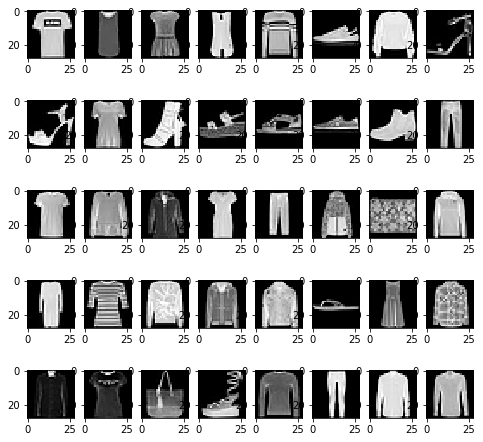

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


## Proof of concept comparing the MLP from sklearn 

In [6]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [8]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 200 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=sigmoid)
soft    (input=512, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.10610254 lr: 0.000100 Val Loss: 0.08916956 Val Acc 0.82441667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.08343330 lr: 0.000100 Val Loss: 0.08236257 Val Acc 0.83658333
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.07837828 lr: 0.000100 Val Loss: 0.07939826 Val Acc 0.84133333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.07568768 lr: 0.000100 Val Loss: 0.07731750 Val Acc 0.84441667
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.07372120 lr: 0.000100 Val Loss: 0.07575045 Val Acc 0.84725000
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.07222612 lr: 0.000100 Val Loss: 0.07440890 Val Acc 0.85091667
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.07113275 lr: 0.000100 Val Loss: 0.07384844 Val Acc 0.84966667
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.07006055 lr: 0.000100 Val L

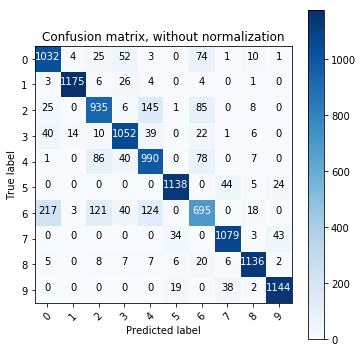

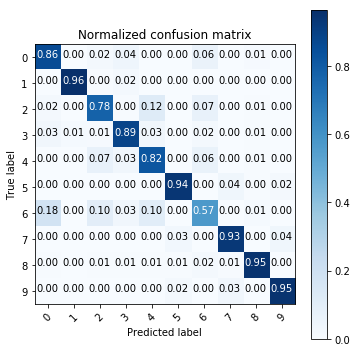

In [9]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'sigmoid',  label="H1")
o1 = network.Layer(512, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=relu)
soft    (input=512, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.07956708 lr: 0.000100 Val Loss: 0.06923102 Val Acc 0.86300000
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.06208077 lr: 0.000100 Val Loss: 0.06261106 Val Acc 0.87708333
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.05642565 lr: 0.000100 Val Loss: 0.06193587 Val Acc 0.87775000
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05237025 lr: 0.000100 Val Loss: 0.05874508 Val Acc 0.88316667
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.04948777 lr: 0.000100 Val Loss: 0.05830223 Val Acc 0.88233333
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.04692515 lr: 0.000100 Val Loss: 0.05954703 Val Acc 0.87950000
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.04477438 lr: 0.000100 Val Loss: 0.05725822 Val Acc 0.88191667
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.04289726 lr: 0.000100 Val Loss

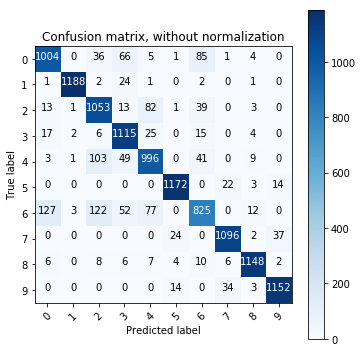

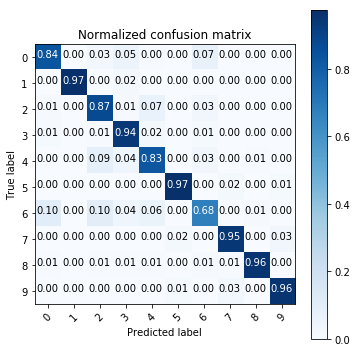

In [10]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'relu',  label="H1")
o1 = network.Layer(512, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=tanh)
soft    (input=512, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.08616926 lr: 0.000100 Val Loss: 0.07773120 Val Acc 0.84133333
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.07123431 lr: 0.000100 Val Loss: 0.07217227 Val Acc 0.85191667
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06706703 lr: 0.000100 Val Loss: 0.06873890 Val Acc 0.85983333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.06420514 lr: 0.000100 Val Loss: 0.06834003 Val Acc 0.86216667
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.06239047 lr: 0.000100 Val Loss: 0.06626176 Val Acc 0.86516667
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.06079470 lr: 0.000100 Val Loss: 0.06562572 Val Acc 0.86958333
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.05959833 lr: 0.000100 Val Loss: 0.06575203 Val Acc 0.86566667
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.05851439 lr: 0.000100 Val Loss

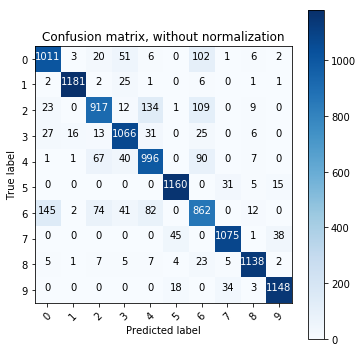

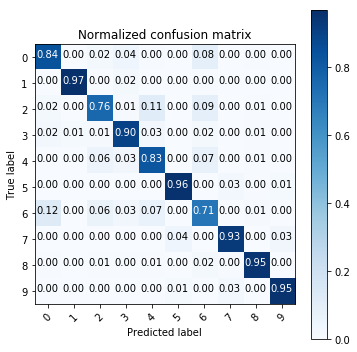

In [11]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'tanh',  label="H1")
o1 = network.Layer(512, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

## Conclusion 
There was a significant difference between the results for the relu and sigmoid, given they used the same hyper-parameters